In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("data.csv")


# Convert 'datetime' column to datetime object
data['datetime'] = pd.to_datetime(data['datetime'])
data.sort_values(by='datetime', inplace=True)
data.set_index('datetime', inplace=True)


'''
plt.plot(data['datetime'],data['TARGET'], color='red')
plt.show()
'''

"\nplt.plot(data['datetime'],data['TARGET'], color='red')\nplt.show()\n"

In [75]:
X = data.drop(columns=['var_cac40'], axis=1)
Y = data['var_cac40']

test_size = 0.2

train_size = int(len(X) * (1-test_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [76]:
seq_len = 2 # taille de sequence pour LSTM

Y_train_model, Y_test_model = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_model = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_model = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_model[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_model[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

X_train_model.shape # verification de la shape

(525394, 2, 10)

In [77]:
'''
lasso = Lasso(alpha= 10)
lasso.fit(X_train,Y_train)
predictions = lasso.predict(X_test)
'''


lasso=Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train,Y_train)

best_params = grid_search.best_params_
print(best_params)

best_lasso = Lasso(alpha=best_params['alpha'])
best_lasso.fit(X_train, Y_train)

predictions = best_lasso.predict(X_test)


{'alpha': 0.1}


In [78]:
print(mean_squared_error(Y_test,predictions))

3.1854183671830487e-06


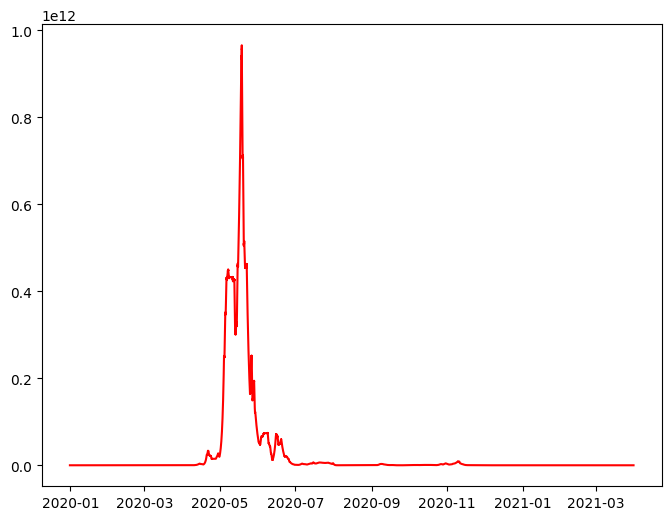

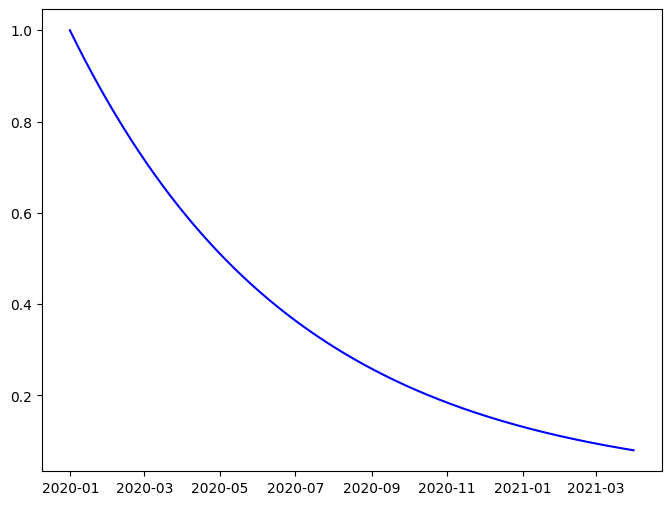

In [79]:
#comparaison predit vs reel
predicted = pd.DataFrame(predictions)
predicted.index = Y_test.index
plt.plot(np.exp(Y_test).cumprod(), 'r')
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()
plt.plot(np.exp(predicted).cumprod(), 'b')
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()